<a href="https://colab.research.google.com/github/faroquehassan/git_test/blob/main/2023_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-07 23:44:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-07 23:44:38 (37.0 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [5]:
df = pd.read_csv('data.csv')

In [6]:
cols = ['Make', 'Model', 'Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [8]:
df = df[cols]

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [13]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [17]:
df.fillna(0,inplace=True)

In [18]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [19]:
df['above_average'] = (df['msrp'] > df['msrp'].mean()).astype(int)

In [25]:
df_full_train, df_test = train_test_split(df, test_size = 0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size =0.25, random_state = 1)

df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [37]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int64
dtype: object

In [38]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [43]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
above_average = (y_pred >= 0.5)
(y_val == above_average).mean()


0.8967687788501888

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.8967687788501888

In [47]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.752
0.10 0.817
0.15 0.841
0.20 0.859
0.25 0.869
0.30 0.880
0.35 0.888
0.40 0.897
0.45 0.900
0.50 0.897
0.55 0.892
0.60 0.888
0.65 0.886
0.70 0.883
0.75 0.875
0.80 0.871
0.85 0.859
0.90 0.846
0.95 0.826
1.00 0.726


In [55]:
from sklearn.metrics import roc_auc_score
auc_scores = {}
for i in df_train[numerical].columns:
  auc = roc_auc_score(y_train,df_train[i])
  auc_scores[i] = auc


In [56]:
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])


In [57]:
auc_df

,AUC Score
year,0.687551
engine_hp,0.917103
engine_cylinders,0.766116
highway_mpg,0.366941
city_mpg,0.326576


In [ ]:
#Q1 - Engine HP has the highest AUC score

In [60]:
for i in numerical:
  score = roc_auc_score(y_train,df_train[i])
  # score = roc_auc_score(df_train[i],y_train)
  print(i, score)

year 0.687551492804683
engine_hp 0.9171031265539011
engine_cylinders 0.766116490165669
highway_mpg 0.3669412128227987
city_mpg 0.3265755356754767


In [61]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver = 'liblinear',C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [62]:
dv, model = train(df_train, y_train)

In [63]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [64]:
y_pred = predict(df_val,dv,model)

In [67]:
roc_auc_score(y_val,y_pred)

0.9797482414575607

In [ ]:
#Q2 - 0.979

In [70]:
thresholds = np.linspace(0, 1, 101)

In [72]:
from sklearn.metrics import roc_curve

In [73]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [85]:
def p_r_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

    return df_scores

In [86]:
df_scores = p_r_dataframe(y_val,y_pred)

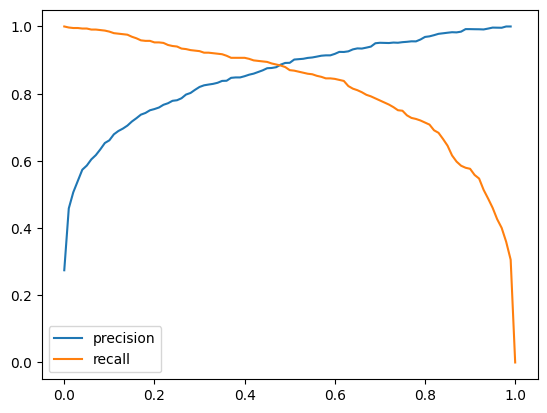

In [87]:
plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()

In [ ]:
#Q3 they intersect at 0.88

In [94]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,770,2,959,0.458509,0.996942
2,0.02,651,634,3,1095,0.506615,0.995413
3,0.03,651,554,3,1175,0.540249,0.995413
4,0.04,650,483,4,1246,0.573698,0.993884
...,...,...,...,...,...,...,...
96,0.96,279,1,375,1728,0.996429,0.426606
97,0.97,262,1,392,1728,0.996198,0.400612
98,0.98,235,0,419,1729,1.000000,0.359327
99,0.99,200,0,454,1729,1.000000,0.305810


In [95]:
df_scores['F1'] = 2*((df_scores.precision*df_scores.recall)/(df_scores.precision + df_scores.recall))

In [98]:
df_scores.sort_values(by ='F1',ascending = False)

,threshold,tp,fp,fn,tn,precision,recall,F1
49,0.49,575,70,79,1659,0.891473,0.879205,0.885296
48,0.48,578,74,76,1655,0.886503,0.883792,0.885145
45,0.45,585,83,69,1646,0.875749,0.894495,0.885023
51,0.51,568,62,86,1667,0.901587,0.868502,0.884735
52,0.52,566,61,88,1668,0.902711,0.865443,0.883685
...,...,...,...,...,...,...,...,...
97,0.97,262,1,392,1728,0.996198,0.400612,0.571429
98,0.98,235,0,419,1729,1.000000,0.359327,0.528684
99,0.99,200,0,454,1729,1.000000,0.305810,0.468384
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688


In [99]:
#Q4 F1 is maximal at  threshold 0.52?

In [100]:
from sklearn.model_selection import KFold


In [102]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['above_average'].values
    y_val = df_val['above_average'].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.978 +- 0.000
0.979 +- 0.001
0.981 +- 0.002
0.980 +- 0.002
0.979 +- 0.002


In [ ]:
#std is 0.003 across different folds

In [103]:
from tqdm.auto import tqdm

In [106]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [107]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C=0.1 0.972 +- 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C=0.5 0.979 +- 0.003


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C=10 0.980 +- 0.004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#sparse = false C=10 gives best
#same with sparse=true